In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

## I: Implementación

### Calculo de error cuadrático

In [221]:
def error_rate(w, X, Y):
    N = X.shape[0]
    E = 0
    for i in range(N):
        E += (np.dot(X[i],w) - Y[i])**2
    return E[0]/N

### Algoritmo de descenso de gradiente

In [222]:
# Algoritmo de descenso de gradiente
def gradient_descent(X, Y, weights, learning_rate):

    dldw = np.zeros((len(weights), 1))
    N = X.shape[0] # número de filas de la matriz X

    # Calculo de la derivada parcial de loss con respecto a cada peso
    for i in range(N):
        dldw += np.transpose([X[i]]) * ((Y[i] - np.dot(X[i], weights))[0])

    weights = weights + learning_rate * dldw
    
    return weights

In [223]:
# Inicialización de Parámetros
random_seed = 1
number_weights = 6
weight_range = 100
x_range = 100 
number_seeds = 10
learning_rate = 0.000001

max_iter = 10000
epsilon = 0.0001

np.random.seed(random_seed)   # Para que los datos sean reproducibles
weights = np.random.choice(np.concatenate((np.arange(-weight_range, 0), np.arange(1, weight_range+1))), size=(number_weights, 1)) #pesos a estimar
X0 = np.ones((number_seeds, 1)) #parametro X0 equivalente a 1 en cada vector X add 
X1toN = np.random.randint(1, x_range+1, size=(number_seeds, number_weights-1))  
X = np.concatenate((X1toN, X0), axis=1)# X = conjunto de variables independientes

#w = weights[0][:-1]
w0 = weights[-1]

#Y = X1toN*w # + w0 que no consideramos por no ser significativa
Y = np.dot(X,weights) 

w = np.ones((number_weights,1)) #pesos iniciales
error = []
gotten_values = []

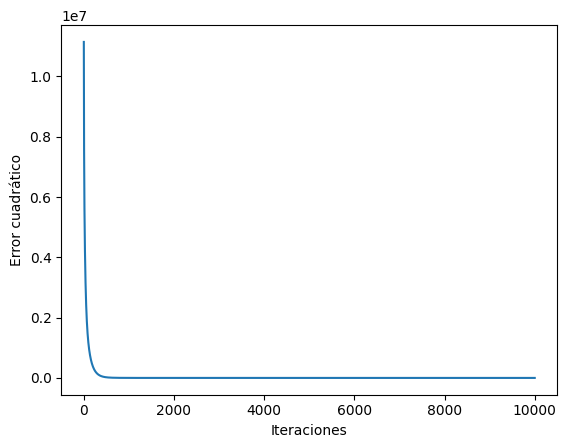

pesos reales: [[-63  41 -28  38  34 -21]]
pesos estimados: [[-63.11190039  40.86958663 -28.08700146  37.93845158  33.94024749
    0.8389794 ]]


In [224]:
#Iteración del algoritmo 
for i in range(max_iter):
    w = gradient_descent(X, Y, w, learning_rate)
    gotten_values.append(w)
    err = error_rate(w, X, Y)
    error.append(err)
    if err < epsilon:
        break
    
p.plot([i+1 for i in range(len(error))], error)
p.xlabel("Iteraciones")
p.ylabel("Error cuadrático")
p.show()

print(f"pesos reales: {np.transpose(weights)}")
print(f"pesos estimados: {np.transpose(w)}")

## II: Preprocesamiento de datos

In [225]:
# loading data
old_df = pd.read_csv('CarDekho.csv')

### Manejo de valores faltantes

In [226]:

# Ver los valores nulos
df_nulos = old_df.isnull().sum().reset_index()
df_nulos.columns = ['variable', '# nulos']
df_nulos = df_nulos[df_nulos['# nulos'] > 0]
df_nulos

,variable,# nulos
11,Engine,80
12,Max Power,80
13,Max Torque,80
14,Drivetrain,136
15,Length,64
16,Width,64
17,Height,64
18,Seating Capacity,64
19,Fuel Tank Capacity,113


De las tablas en el archivo .csv, aquellas con valores nulos son:
* Engine
* Max Power
* Max Torque
* Drivetrain
* Length
* Width
* Height
* Seaing Capacity
* Fuel Tank Capacity

En este caso, el manejo de datos faltantes se realizará de la siguiente manera:
* **Valores numéricos:**  Se reemplazan por la mediana del atributo.
* **Valores no numéricos:** Se reemplazan por el valor más común del atributo.

In [227]:
df = old_df

# Manejo de datos faltantes para valores numéricos
mean_length = df.loc[:, 'Length'].mean()
mean_width = df.loc[:, 'Width'].mean()
mean_height = df.loc[:, 'Height'].mean()
mean_seats = df.loc[:, 'Seating Capacity'].mean()
mean_tank = df.loc[:, 'Fuel Tank Capacity'].mean()

# Manejo de datos faltantes para valores categóricos
common_drive = df.loc[:, 'Drivetrain'].value_counts().index[0]
common_engine = df.loc[:, 'Engine'].value_counts().index[0]
common_power = df.loc[:, 'Max Power'].value_counts().index[0]
common_torque = df.loc[:, 'Max Torque'].value_counts().index[0]

# Reemplazo de valores nulos
df.loc[:, 'Length'] = df.loc[:, 'Length'].fillna(mean_length)
df.loc[:, 'Width'] = df.loc[:, 'Width'].fillna(mean_width)
df.loc[:, 'Height'] = df.loc[:, 'Height'].fillna(mean_height)
df.loc[:, 'Seating Capacity'] = df.loc[:, 'Seating Capacity'].fillna(mean_seats)
df.loc[:, 'Fuel Tank Capacity'] = df.loc[:, 'Fuel Tank Capacity'].fillna(mean_tank)
df.loc[:, 'Drivetrain'] = df.loc[:, 'Drivetrain'].fillna(common_drive)
df.loc[:, 'Engine'] = df.loc[:, 'Engine'].fillna(common_engine)
df.loc[:, 'Max Power'] = df.loc[:, 'Max Power'].fillna(common_power)
df.loc[:, 'Max Torque'] = df.loc[:, 'Max Torque'].fillna(common_torque)

### Normalización de los datos

<Axes: >

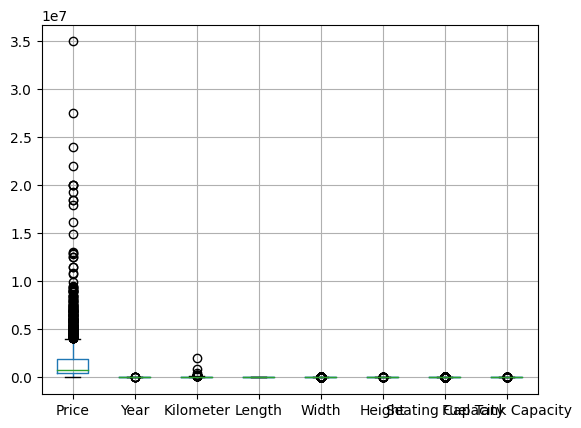

In [228]:
df.boxplot()

Del boxplot, se observa que las columnas *Price* y *Kilometer* tienen valores mucho mayores que las demás variables. Por ende, se normalizan todas las columnas numéricas para que sus valores estén entre 0 y 1 y den datos más concisos.

<Axes: >

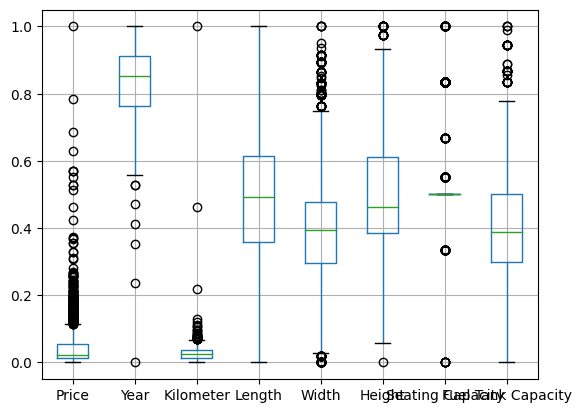

In [229]:
def normalize_column(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalización de datos
df.loc[:, 'Price'] = normalize_column(df.loc[:, 'Price'])
df.loc[:, 'Year'] = normalize_column(df.loc[:, 'Year'])
df.loc[:, 'Kilometer'] = normalize_column(df.loc[:, 'Kilometer'])
df.loc[:, 'Length'] = normalize_column(df.loc[:, 'Length'])
df.loc[:, 'Width'] = normalize_column(df.loc[:, 'Width'])
df.loc[:, 'Height'] = normalize_column(df.loc[:, 'Height'])
df.loc[:, 'Seating Capacity'] = normalize_column(df.loc[:, 'Seating Capacity'])
df.loc[:, 'Fuel Tank Capacity'] = normalize_column(df.loc[:, 'Fuel Tank Capacity'])

df.boxplot()

### Manejo de valores categóricos
Se utiliza la función *get_dummies* de la librería Panda para crear nuevas columnas $n$ columnas por cada uno de los atributos categóricos que tenemos. Con este paso, se mantuvieron únicamente las columnas recomendadas en el enunciado del proyecto para ser atributos de entrada próximamente:
* Make
* Year
* Kilometer
* Fuel Type
* Transmission
* Owner
* Seating Capacity
* Fuel Tank Capacity

También se mantuvo la columna *Price* en una nueva variable llamada *df_price* puesto que sabemos que son los datos a los que queremos llegar próximamente con nuestra función de descenso de gradiente.

In [230]:
df_price = df[['Price']]
df = pd.get_dummies(df[["Make", "Year", "Kilometer", "Fuel Type", "Transmission", "Owner", "Seating Capacity", "Fuel Tank Capacity"]])

Para mantener los valores pre-procesados guardados, creamos un nuevo csv que es con el que estaremos trabajando de aquí en adelante.

In [231]:
df.to_csv('clean_data.csv', index=False)
df = pd.read_csv('clean_data.csv')

## Predecir el precio de venta de un automóvil